In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, FloatSlider
%matplotlib inline

pi = np.pi

plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

In [2]:
def plot_spectrum(omega, X, T_s, 
                  x_label=r'$\omega/\frac{\pi}{T_\mathrm{s}}$',
                  y_label=r'$X(j\omega)$',
                  x_lim=None):
    plt.figure()
    plt.axhline(c='k', lw=2, alpha=0.75)
    plt.plot(omega*T_s/pi, X, 'b', lw=4)
    plt.axvline(c='k', lw=2, alpha=0.75)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim((min(X)-0.1, max(X)+0.1))
    if x_lim is not None:
        plt.xlim(x_lim)
    plt.grid(True)

In [3]:
def rect(omega, W):
    return (np.abs(omega) < W/2)

# Aufgabe 15: Pulsamplitudenmodulation I

![Blockschaltbild](figures/A15/System_Blockdiagramm.png)

Es soll ein digitales Sprachfunksystem auf Grundlage einer PAM-Übertragung im Frequenzband von $1,50 \,\mathrm{MHz}-1,52\,\mathrm{MHz}$ realisiert werden. Als Pulsform werden Raised-Cosine-Impulse gewählt. Die Sprache wird mit $8\mathrm{kHz}$ abgetastet und mit einer Auflösung von $8\,\mathrm{Bit}$ pro Abtastwert quantisiert.

In [4]:
T_s = 2
r = 0.5
omega = np.linspace(-6*pi/T_s, 6*pi/T_s, 1000)
omega_0 = 3*np.pi/T_s
om_0 = omega_0*T_s/np.pi

W_c = 1.25*2*np.pi/T_s

## Vorbemerkungen
Für eine Bandpassübertragung sind die Signale zwischen Sender- und Empfänger ebenfalls im Bandpassbereich zu sehen.
Die Verbindung mit den Basisbandsignalen ist folgendermaßen:

\begin{align}
    x(t) &= \sqrt{2} \mathrm{Re} \left\{ s(t) \mathrm{e}^{j \omega_0 t} \right\} = \sqrt{2}s_r(t)\cos(\omega_0 t) - \sqrt{2}s_i(t)\sin(\omega_0 t)\\
    y(t) &= \sqrt{2} \mathrm{Re} \left\{ r(t) \mathrm{e}^{j \omega_0 t} \right\} = \sqrt{2}r_r(t)\cos(\omega_0 t) - \sqrt{2}r_i(t)\sin(\omega_0 t)\\
\end{align}

Eine ähnliche Beziehung gilt auch für das Kanalfilter. Die Formel ist einfacher, weil der Kanal als reell angenommen wird:

\begin{align}
    b_\mathrm{BP}(t) = b(t)\, 2\cos(\omega_0 t)
\end{align}    
    
Wenn die Randbedingungen des Übertragungssystems eine Bandbreite vorgeben, kann dies durch das Kanalfilter ausgedrückt werden:

\begin{align}
    \mathcal{F}\left\{ b_\mathrm{BP}(t) \right\} = B_\mathrm{BP}(j\omega) = \mathrm{rect} \left( \frac{\omega - \omega_0}{W_{c}} \right) + \mathrm{rect}\left( \frac{\omega - \omega_0}{W_{c}} \right)
\end{align}

Die Mittenfrequenz ist hier $f_0 = 1,51\,\mathrm{MHz}$ und die einseitige Bandbreite ist $B_{c} = 20\,\mathrm{kHz}$.   
Damit ergibt sich im Bereich der Kreisfrequenzen: $\omega_0 = 2\pi\cdot 1,51\mathrm{MHz}$ und $W_{c} = 2\pi \cdot 20\,\mathrm{kHz}$.

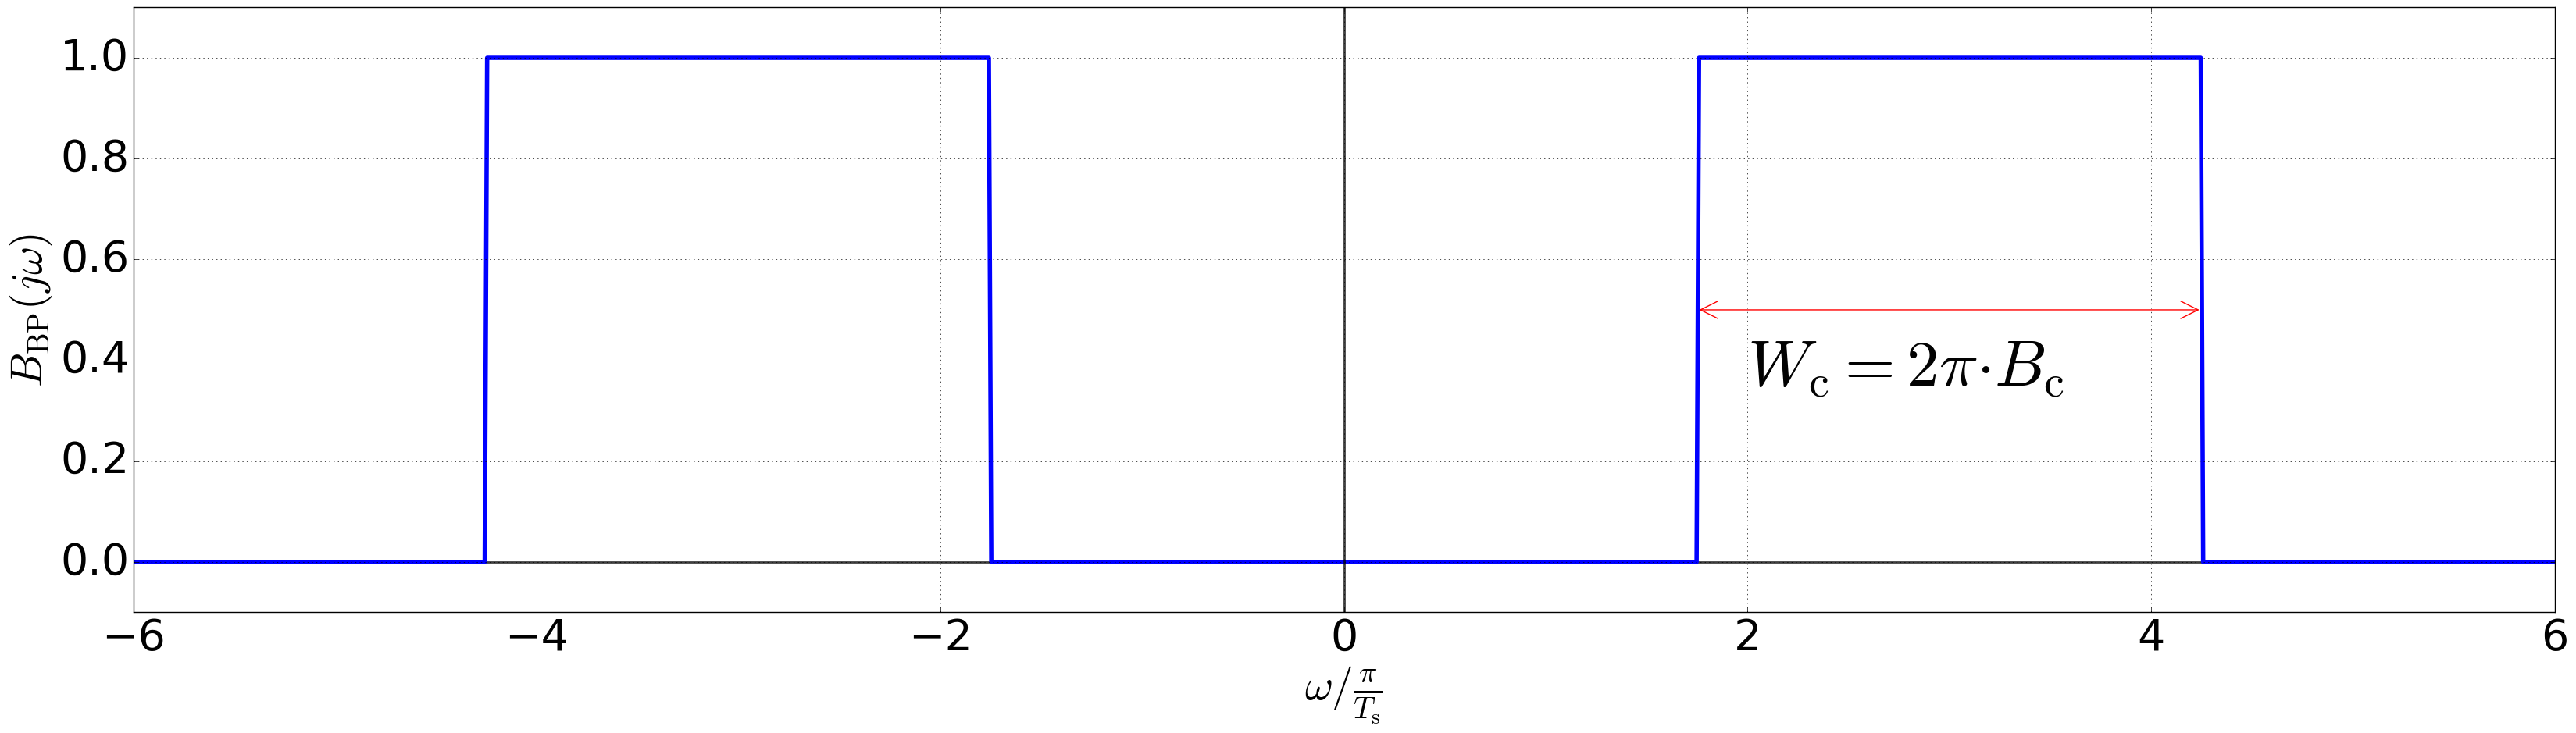

In [5]:
B_BP = rect(omega + omega_0, W_c) + rect(omega - omega_0, W_c)

# Annotationen
w_norm = W_c*T_s/(2*np.pi)
plot_spectrum(omega, B_BP, T_s=T_s, y_label=r'$B_\mathrm{BP}(j\omega)$')
plt.annotate('', (om_0-w_norm, 0.5), (om_0+w_norm, 0.5),
             arrowprops={'arrowstyle':'<->','color':'r'});
plt.text(om_0-1, 0.35, r'$W_\mathrm{c}= 2\pi {\cdot} B_\mathrm{c}$',
         fontsize=60);

## 15.1:
Welcher Rolloff-Faktor soll für eine möglichst robuste Übertragung verwendet werden, wenn 16-QAM verwendet wird? Wie groß ist die erzielte Bandbreiteeffizienz?

### Definition des Raised-Cosine-Puls im Basisband:

#### Zeitbereich (im Basisband):

\begin{align}
    p(t) = \mathrm{si} \left( \pi \frac{t}{T_\mathrm{s}} \right)
           \frac{\cos \left(r\pi \frac{t}{T_\mathrm{s}} \right)}
           {1 - \left(2 r \, \frac{t}{T_\mathrm{s}} \right)^2}
\end{align}

Durch die Fensterung der si-Funktion mit der quadratisch abfallenden Funktion wird ein schneller abfallender Puls erzeugt. Dadurch vergrößert sich jedoch auch die (einseitige) Bandbreite auf $B_\mathrm{RC,TP} = \frac{(1+r)}{2 T_\mathrm{s}}$:

#### Frequenzbereich (im Basisband):

\begin{align}
    P(j\omega) = 
    \begin{cases}
            T_\mathrm{s} &\quad:|\omega| < (1-r)\frac{\pi}{T_\mathrm{s}} \\
            \frac{T_\mathrm{s}}{2} \left( 1 -\sin\left( \frac{T_\mathrm{s}}{2 r} \left(|\omega| - \frac{\pi}{T_\mathrm{s}} \right) \right) \right) & \quad:(1-r)\frac{\pi}{T_\mathrm{s}} < |\omega| < (1+r)\frac{\pi}{T_\mathrm{s}} \\
            0 & \quad:|\omega| > (1+r)\frac{\pi}{T_\mathrm{s}}
    \end{cases}
\end{align}

In [6]:
def raised_cosine_spectrum(omega, T_s, r):
    def rc_edge(omega, T_s, r):
        return 1/2*(1-np.sin(T_s/(2*r)*(np.abs(omega) - np.pi/T_s)))

    return T_s*(rect(omega, (1-r)*2*np.pi/T_s) + (
        rc_edge(omega, T_s, r)*rect(omega - np.pi/T_s, 2*r*np.pi/T_s) +
        rc_edge(omega, T_s, r)*rect(omega + np.pi/T_s, 2*r*np.pi/T_s)
        if r>0 else omega*0 ))

Damit ISIs vermieden werden, ist der Rolloff-Faktor des Raised-Cosine-Pulses so zu wählen, dass er in die Bandbreite passt, die durch den Kanal vorgegeben wird. Genau in dem Fall hat der Kanal keine Auswirkungen auf die Pulsform.
Möglichst robust heißt hier, dass der Rolloff-Faktor so groß wie möglich gewählt wird.

#### Basisband-Fall:
Im Basisband gilt: $p(t) = g(t) \ast b(t) \ast f(t)$
Wird $g(t) \ast f(t)$ als Raised-Cosine-Puls gewählt, muss im Frequenzbereich gelten:

\begin{align}
    P(j\omega) = G(j\omega) B(j\omega) F(j\omega) \overset{!}{=} G(j\omega) F(j\omega)
\end{align}

Anschaulich muss also das Spektrum des Raised-Cosine-Pulses in den Bandpass "hineinpassen", ohne dass etwas abgeschnitten wird.
Das ist genau dann der Fall, wenn $W_{\mathrm{RC,TP}} \leq W_{c}$ gilt.

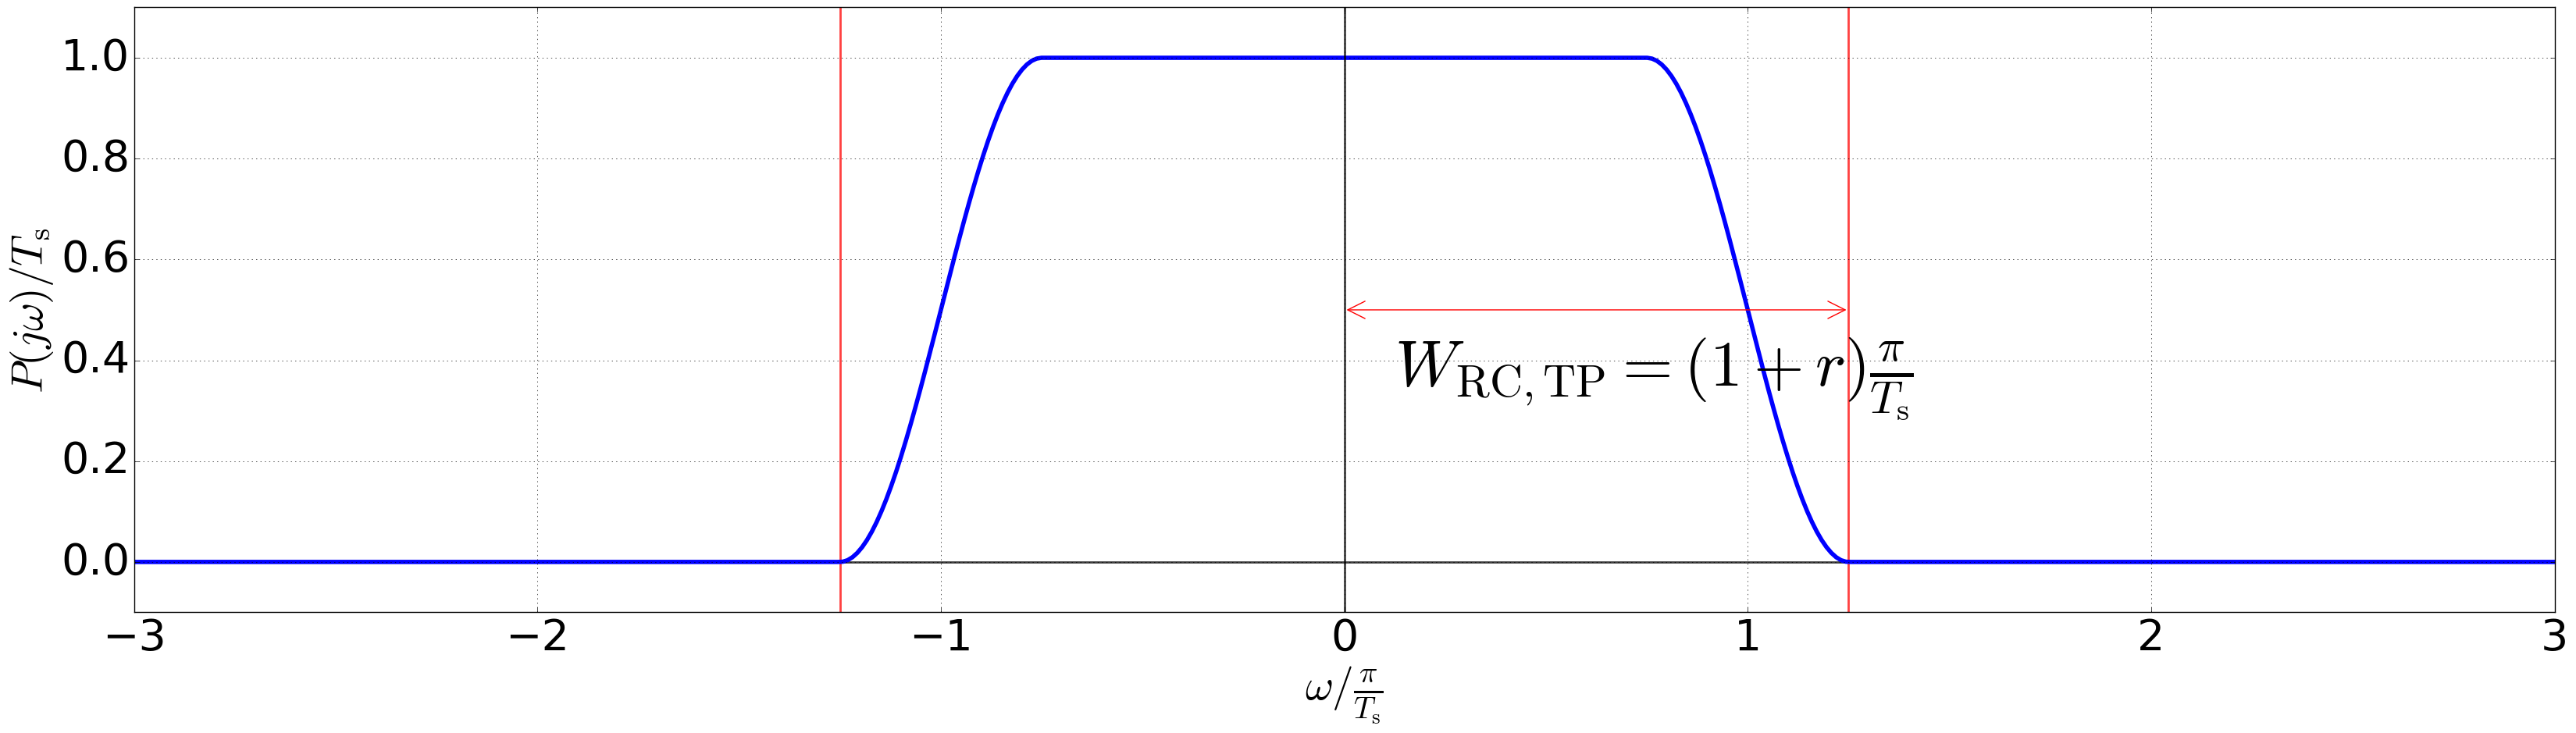

In [7]:
@interact(rolloff=FloatSlider(min=0, max=1, step=0.05, value=0.25))
def plot_raised_cosine(rolloff):
    r = rolloff
    P_w = raised_cosine_spectrum(omega, T_s, r)
    plot_spectrum(omega, P_w/T_s, T_s=T_s,
                  y_label=r'$P(j\omega)/T_\mathrm{s}$',
                 x_lim=(-3, 3))

    # Annotationen
    plt.vlines([-(1+r), (1+r)], -1, [2, 2], 'r', alpha=0.75);
    plt.annotate('', (0, 0.5), ((1+r), 0.5),
                 arrowprops={'arrowstyle':'<->','color':'r'});
    plt.text((r+1)/10, 0.35, r'$W_\mathrm{RC,TP}=(1+r)\frac{\pi}{T_\mathrm{s}}$',
             fontsize=60);

#### Bandpass-Fall:
Im Bandpassfall wird mit $p_\mathrm{BP}(t) = p(t)\cdot2 \cos(\omega_0 t)$ gearbeitet. Hier muss gelten:

\begin{align}
    P_\mathrm{BP}(j\omega) = G_\mathrm{BP}(j\omega) H(j\omega) F_\mathrm{BP}(j\omega) \overset{!}{=} G_\mathrm{BP}(j\omega) F_\mathrm{BP}(j\omega)
\end{align}

Das ist dann erfüllt, wenn $W_{\mathrm{RC,BP}} \leq W_{c}$ gilt. Wie üblich gilt jedoch $W_\mathrm{RC,BP} = 2\cdot W_\mathrm{RC,TP}$:

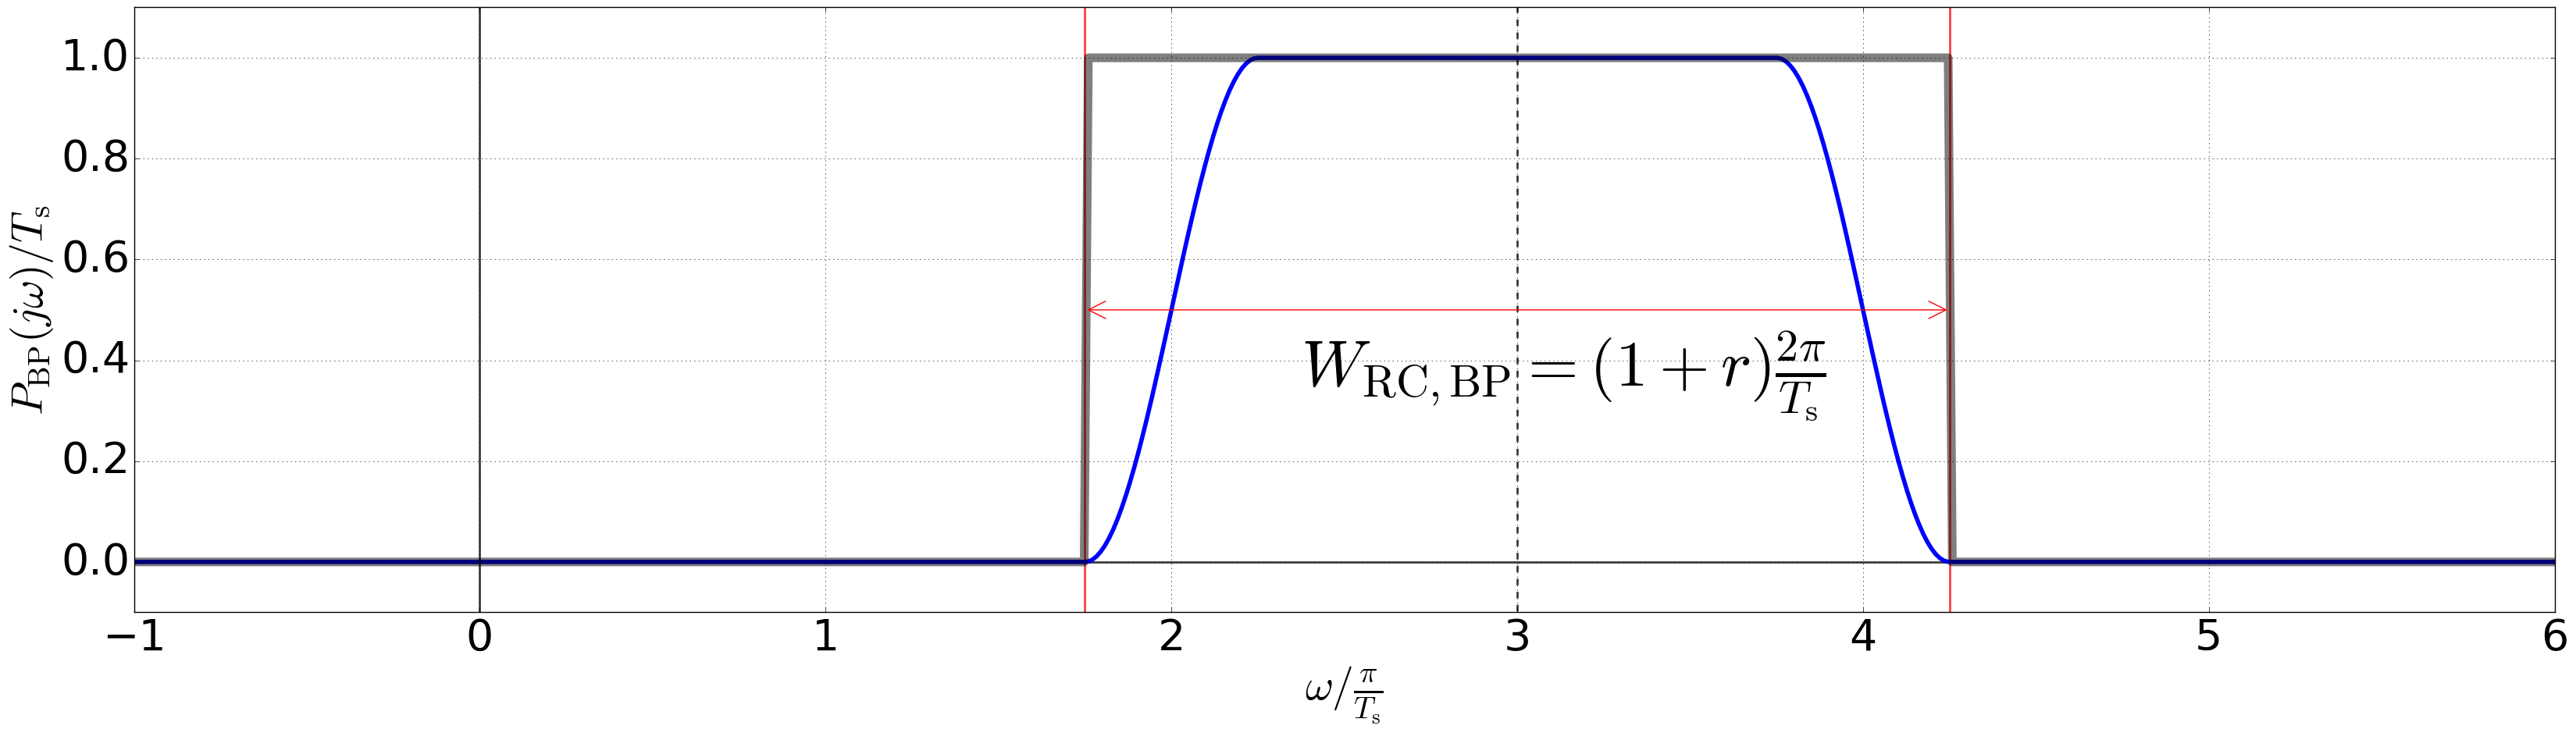

In [8]:
@interact(rolloff=FloatSlider(min=0, max=1, step=0.05, value=0.25))
def plot_raised_cosine_bandpass(rolloff):
    r = rolloff
    P_w_BP = (raised_cosine_spectrum(omega - omega_0, T_s, r) +
              raised_cosine_spectrum(omega + omega_0, T_s, r) )
    plot_spectrum(omega, P_w_BP/T_s, T_s=T_s,
                  y_label=r'$P_\mathrm{BP}(j\omega)/T_\mathrm{s}$',
                 x_lim=(-1, 6))

    # Annotationen
    plt.plot(omega*T_s/np.pi, B_BP, 'k', lw=8, alpha=0.5)

    plt.vlines([3], -1, [2], 'k', alpha=0.75,
               linestyle='dashed')
    plt.vlines([om_0-(1+r), om_0+(1+r)], -1, [2, 2], 'r', alpha=0.75);
    plt.annotate('', (om_0-(1+r), 0.5), (om_0+(1+r), 0.5),
                 arrowprops={'arrowstyle':'<->','color':'r'});
    plt.text(om_0-(1+r)/2, 0.35, r'$W_\mathrm{RC,BP}=(1+r)\frac{2 \pi}{T_\mathrm{s}}$',
             fontsize=60);

Ein Bit ist als eine binäre Entscheidung aufzufassen. $|\Omega_A|$ Symbole können mit $\log_2|\Omega_A|$ binären  Entscheidungen unterschieden werden. (Zum Beispiel: linke/rechte Halbebene, obere/untere Halbebene, usw.).  Wird ein Symbol im Empfänger korrekt erkannt, können damit also auch $\log_2|\Omega_A|$ Bits übertragen werden.  

Zwischen **Datenrate** und **Symbolrate** gilt also die Beziehung

\begin{align}
    \frac{1}{T_\mathrm{b}} = \log_2|\Omega_A| \cdot \frac{1}{T_\mathrm{s}}.
\end{align}


Aus der Vorlesung ist bekannt:

\begin{align}
    W_{\mathrm{RC,BP}} &= (1+r)\frac{2\pi}{T_\mathrm{s}} = \frac{1+r}{\log_2|\Omega_A|}\frac{2\pi}{T_\mathrm{b}} \overset{!}{=} W_c = 2 \pi B_c \\
    \Rightarrow r &= \log_2|\Omega_A| B_c T_\mathrm{b} -1
\end{align}

Um den Rolloff-Faktor zu berechnen, werden also die **Datenrate**, die **verfügbare Bandbreite** und **die Anzahl der Bits pro Sendesymbol** benötigt.

#### Benötigte Datenrate:
Aus der Aufgabenstellung ist bekannt:

\begin{align}
    \frac{1}{T_\mathrm{abt}} = 8\,\mathrm{kHz} = 8\,\mathrm{kSamples/s},
\end{align}

die Anzahl der Bits pro Abtastwert ist 

\begin{align}
    w = 8\,\mathrm{Bit/Sample}
\end{align}

Also folgt: 

\begin{align}
    \frac{1}{T_\mathrm{b}} = \frac{1}{T_\mathrm{abt}} \cdot w = 8\,\mathrm{kSamples/s} \cdot 8\,\mathrm{Bit/Sample} = 64 \mathrm{kBit/s}.
\end{align}

#### Rolloff-Faktor
Wegen 16-QAM gilt außerdem: 

\begin{align}
    |\Omega_A| = 16 = 2^4 \Rightarrow \log_2|\Omega_A| = 4\,\mathrm{Bit/Symbol}.
\end{align}

Damit folgt:

\begin{align}
    r = 4\,\mathrm{Bit/Symbol} \cdot \frac{20\,\mathrm{kHz}}{64\,\mathrm{kBit/s}} -1 = \frac{5}{4} -1 = \frac{1}{4}.
\end{align}

(Hinweis: Samples und Symbole sind Pseudoeinheiten, die auch weggelassen werden können, aber zum Verständnis beitragen.)

Die Bandbreiteeffizienz ist als Datenrate pro  Bandbreite des Pulses (in Hz) definiert, also in diesem Fall:

\begin{align}
    \nu = \frac{\frac{1}{T_\mathrm{b}} }{ B_\mathrm{RC,BP} } = \frac{2 \pi \frac{1}{T_\mathrm{b}} }{ W_\mathrm{RC,BP} } = \frac{\log_2|\Omega_A|}{1 + r} =  \frac{4}{1 + \frac{1}{4}} = \frac{16}{5}\frac{\mathrm{Bit/s}}{\mathrm{Hz}} = 3,2\,\frac{\mathrm{Bit/s}}{\mathrm{Hz}}
\end{align}

## 15.2:
Bestimmen Sie den Bereich, in dem die Symbolrate mit 16-QAM liegen muss, wenn keine Intersymbolinterferenzen toleriert werden.

Hier müssen zwei Grenzen eingehalten werden:
 1. Die benötigte Datenrate von $1/T_\mathrm{b} = 64 \mathrm{kBit/s}$ muss erreicht werden.
 2. der Rolloff-Faktor muss semipositiv sein.
 
Mit der ersten Teilaufgabe ist die minimale Datenrate erreicht worden. Hier gilt    

\begin{align}
    1/T_\mathrm{s,min} = \frac{1/T_\mathrm{b}  }{ \log_2|\Omega_A| }
     = \frac{64\,\mathrm{kBit/s}}{ 4\,\mathrm{Bit/Symbol}} = 16\,\mathrm{kSymbole/s}= 16\,\mathrm{kBaud}
\end{align}

Setzt man $r=0$, erhält man

\begin{align}
    1/T_\mathrm{s,max} = B_c = 20\,\mathrm{kSymbole/s} = 20\,\mathrm{kBaud}
\end{align}

Insgesamt folgt also: $ 16\,\mathrm{kBaud} \leq 1/T_\mathrm{s} \leq 20\,\mathrm{kBaud}$.

## 15.3:
Vergleichen Sie den Bandbreitebedarf des digitalen Systems mit der analogen mit Einseitenband- oder Zweiseitenbandmodulation.

Wenn man annimmt, dass das Abtasttheorem eingehalten wurde, belegt das Sprachsignal am Eingang im Analogen eine (einseitige!) Bandbreite von $4\,\mathrm{kHz}$.   
Bei der Zweiseitenbandmodulation müssen die positiven und die negativen Frequenzen gesendet werden, weshalb eine Bandbreite von $B_\mathrm{DSB} = 8\,\mathrm{kHz}$ benötigt wird.   
Bei der Einseitenbandmodulation wird nur die halbe Bandbreite von $B_\mathrm{SSB} = 4\,\mathrm{kHz}$ benötigt.   

Dabei kamen die beiden wesentlichen Vorteile der digitalen Übertragung aber noch gar nicht zum Tragen:
 1. Das Signal kann annähernd fehlerfrei übertragen werden, sofern die Quantisierung keine wesentliche Rolle spielt. Bei der Analogen Übertragung kann der Einfluss des Rauschens auf dem Kanal nicht komplett entfernt werden.
 2. Es ist anzunehmen, dass eine Menge Redundanz in den Abtastwerten des Sprachsignals vorhanden ist. Nach der Digitalisierung kann deshalb eine Datenkompression stattfinden, die die benötigte Übertragungsrate wesentlich reduziert. Die Grundlagen dazu werden im Kapitel über **Informationstheorie** besprochen, während konkrete Kompressionsverfahren Teil der Vorlesung **"Digitale Sprachsignalverarbeitung"** im Master sind.

Die Bitrate soll nun erhöht werden. Grundsätzlich gibt es zwei Maßnahmen, um dieses Ziel zu ereichen, ohne den Bandbreitebedarf zu erhöhen.

## 15.4:
Diskutieren Sie beide Maßnahmen. Gehen sie davon aus, dass es im Empfänger geringe Abweichungen vom idealen Abtastzeitpunkt gibt! Kann man den negativen Konsequenzen durch die Erhöhung der Sendeleistung entgegenwirken?

Allgemein gilt: $\frac{1}{T_\mathrm{b}} = \log_2|\Omega_A| \frac{1}{T_\mathrm{s}}$   
Die Bitrate kann also entweder durch **Erhöhung der Symbolrate** oder **Vergrößerung des Symbolalphabets** erhöht werden.

1. **Erhöhung der Symbolrate**: In Teilaufgabe 2 wurde bereits besprochen, dass bei konstanter Bandbreite der Rolloff-Faktor bis auf 0 gesenkt werden kann, um die Symbolrate zu erhöhen. Dadurch fällt jedoch der Puls über die Symboldauer schneller ab und das System ist wesentlich anfälliger gegenüber Abtastfehlern, weil der Einfluss der Nachbarpulse stärker wird. Dies ist unabhängig von der Vergrößerung der Sendeleistung, weil die Intersymbolinterferenzen dann auch zunehmen.


2. **Vergrößerung des Symbolalphabets**: Bei jeder Verdoppelung der Größe des Symbolalphabetes kann ein zusätzliches Bit pro Symbol übertragen werden. Bei konstant gehaltener Sendeleistung rücken die Symbole im Symbolraum aber näher zusammen, der Mindestabstand verringert sich und die Bitrate steigt. Dies lässt sich durch Erhöhung der Sendeleistung verhindern, weil sich die Symbolabstände dadurch wieder vergrößern.

## 15.5:
Um welchen Faktor muss die maximale Energie pro Puls bei 64-QAM im Vergleich zu 16-QAM erhöht werden, damit die Symbolfehlerrate im Empfänger annähernd gleich bleibt?

#### 16-QAM:
![16-QAM](figures/A15/QAM_16.png)

#### 64-QAM:
![64-QAM](figures/A15/QAM_64.png)

Damit die Fehlerrate annähernd konstant bleibt, muss der minimale Symbolabstand gleich bleiben:

\begin{align}
    d_\mathrm{min,64} = d_\mathrm{min,16} = d_\mathrm{min}
\end{align}

Der Abstand $d_\mathrm{min}$ bezieht sich auf die Amplitude der Symbole. Die Leistung eines Symbols hängt quadratisch von der Amplitude ab. Die Energie pro Sendepuls ist also proportional zum Quadrat des Symbolabstandes:

\begin{align}
    \sigma_A^2 &\propto d_\mathrm{min} \\
    \Rightarrow E_s = \sigma_A^2 E_h &\propto d_\mathrm{min}^2
\end{align}

Die maximale Energie ergibt sich, wenn ein Symbol gesendet wird, das am weitesten vom Ursprung entfernt ist:

\begin{align}
    E_{s,\mathrm{max}} \propto d_\mathrm{max}^2
\end{align}

Dies ist für 16-QAM:

\begin{align}
    E_{s,\mathrm{max,16}} &\propto \left(\frac{3}{2}d_\mathrm{min}\right)^2 + \left(\frac{3}{2}d_\mathrm{min}\right)^2 \\
    &= \frac{9}{2}d_\mathrm{min}^2
\end{align}

und für 64-QAM:

\begin{align}
    E_{s,\mathrm{max,64}} &\propto \left(\frac{7}{2}d_\mathrm{min}\right)^2 + \left(\frac{7}{2}d_\mathrm{min}\right)^2 \\
    &= \frac{49}{2}d_\mathrm{min}^2,
\end{align}

wobei die Proportionalitätskonstante jeweils gleich ist. Der Faktor, um den die maximale Sendeenergie erhöht werden muss, ist also

\begin{align}
    \frac{E_{s,\mathrm{max,64}}}{E_{s,\mathrm{max,16}}} = \frac{49}{9} \approx 5.444
\end{align}

In der Praxis wird manchmal die 64-QAM-Signalraumkonstellation wie folgt modifiziert:

![64-QAM mit Modifikation](figures/A15/QAM_64_mod.png)

## 15.6:
Warum ist diese Modifikation sinnvoll?

![Erklärung der Modifikation](figures/A15/QAM_64_mod_expl.png)

Mit dieser Modifikation wird gerade das Symbol, das die maximale Sendeenergie benötigt, näher an den Ursprung gebracht. Die maximale Sendeenergie wird dadurch reduziert:

\begin{align}
    E_{s,\mathrm{max,64,old}} &\propto \frac{49}{2}d_\mathrm{min}^2 = 24.5\cdot d_\mathrm{min}^2\\
    E_{s,\mathrm{max,64,new}} &\propto \left( \frac{9}{2}d_\mathrm{min} \right)^2 + \left( \frac{1}{2}d_\mathrm{min} \right)^2 \\
    &= \frac{41}{2} = 20.5\cdot d_\mathrm{min}^2 < E_{s\mathrm{max,64,old}}
\end{align}

## 15.7:
Warum sollte man nach der Modifikation die Zuordnung der Bitmuster zu den Sendesymbolen ändern?

Für Quadraturamplitudenmodulation sollte idealerweise der Graycode verwendet werden. 
Bei der Übertragung ist ein Verwechseln mit den direkten Nachbarsymbolen bei Weitem am wahrscheinlichsten.
Bei Gray-Codierung unterscheiden sich die Bitmuster der nächsten Nachbarn eines Symbols nur in einem Bit von dessen Bitmuster und aus einem Symbolfehler wird nur ein einziger Bitfehler.  

Wird die Signalraumkonstellation verändert, verändert sich auch das Nachbarschaftsverhältnis für die verschobenen Symbole und ihre Nachbarn. Deshalb sollte wieder neu zugeordnet werden, um den Gray-Code wiederherzustellen.